## PCA for iris dataset

In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [18]:
df = pd.read_csv('iris.data.txt', header=None, sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

In [19]:
df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
# split data table into data X and class labels y

X = df.ix[:,0:4].values
Y = df.ix[:,4].values

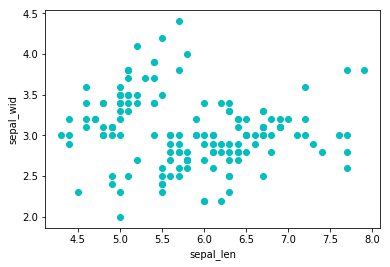

In [72]:
plt.scatter(X[:, 0], X[:, 1], color='c')
plt.xlabel('sepal_len')
plt.ylabel('sepal_wid')
plt.show()

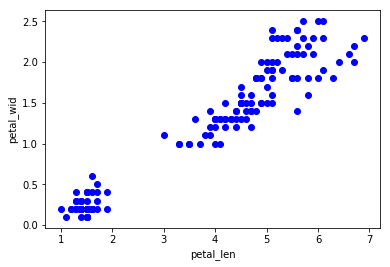

In [74]:
plt.scatter(X[:, 2], X[:, 3], color='b')
plt.xlabel('petal_len')
plt.ylabel('petal_wid')
plt.show()

In [37]:
def normalize(X):
    '''
      Normalise data before processing
      Return normalized data and normalization parameters
    '''
    num = X.shape[1]
    norm_params = np.zeros((2, num))
    norm_params[0] = X.mean(axis = 0)
    norm_params [1] = X.std(axis = 0, ddof = 1)
    norm_X = (X - norm_params[0]) / norm_params [1]
    
    return norm_X, norm_params

In [38]:
norm_X, norm_params = normalize(X)

mean_vec = np.mean(norm_X, axis=0)
cov_mat = (norm_X - mean_vec).T.dot((norm_X - mean_vec)) / (norm_X.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


In [39]:
print('NumPy covariance matrix: \n%s' %np.cov(norm_X.T))

NumPy covariance matrix: 
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


In [40]:
def transform(X, n_components):
    '''
        Select components with largest variance:
            1) Estimate covariance matrix
            2) Find its eigenvalues and eigenvectors
            3) Check if eigenvalues are complex -> to real space
            4) Sort vals & vectors
            5) Select n components
            5) Project all data on the selected components  
    '''
    cov = np.dot(X.T, X) / len(X)
    
    e_val, e_vect = np.linalg.eig(cov)
    
    e_val = np.absolute(e_val)
    
    ind = np.argsort(-e_val)
    e_vect = e_vect[:, ind]
    e_vect = e_vect.astype(float)
    
    e_vect_reduced = e_vect[:, :n_components]
    new_X = np.dot(X, e_vect_reduced)
    
    print('Eigenvectors \n%s' %e_vect)
    print('\nEigenvalues \n%s' %e_val)
    return new_X, e_vect_reduced

In [41]:
def restore(X_reduced, evect_reduced, norm_params):
    '''
        Restore "original" values:
            1) Restore original size
            2) Rescale
    '''
    
    
    X_rest = np.dot(X_reduced, evect_reduced.T)
    X_rest = (X_rest * norm_params[1]) + norm_params[0]
    return X_rest

In [42]:
number_of_components = 1

# normalization
X_norm, norm_params = normalize(np.copy(X))

# dimension reduction
X_reduced, evect_reduced = transform(X_norm, number_of_components)

# restoring dimensions
restored_X = restore(X_reduced, evect_reduced, norm_params)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[ 2.89141263  0.91507946  0.14637092  0.02047032]


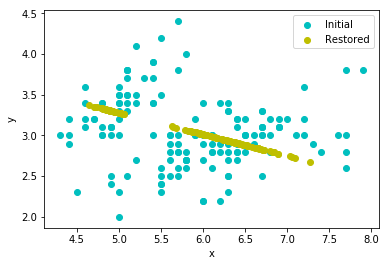

In [68]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], color='c', label='Initial')
plt.scatter(restored_X[:, 0], restored_X[:, 1], color='y', label='Restored')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [51]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler


In [52]:
X_std = StandardScaler().fit_transform(X)
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

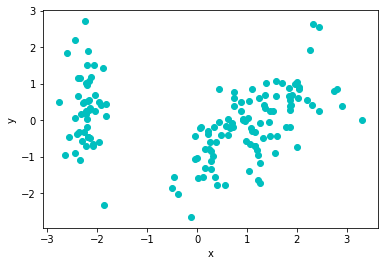

In [71]:
plt.figure()
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], color='c')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()